# MNIST

## 3 ConvNet layers + 2 Dense

In [ ]:
import numpy as np

from keras import models
from keras import layers
from keras import activations
from keras import optimizers
from keras import losses
from keras import regularizers
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt

NUM_CLASSES = 10


def plot_history(history):
    hist_dict = history.history
    loss_values = hist_dict['loss']
    val_loss_values = hist_dict['val_loss']
    acc_values = hist_dict['acc']
    val_acc_values = hist_dict['val_acc']

    epochs = range(1, len(loss_values) + 1)

    fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1,
                                   sharex='all', figsize=(10, 7))
    ax0.plot(epochs, loss_values, 'bo')
    ax0.plot(epochs, val_loss_values, 'b+')
    ax0.set_ylabel('Loss')

    ax1.plot(epochs, acc_values, 'bo')
    ax1.plot(epochs, val_acc_values, 'b+')
    ax1.set_ylabel('Accuracy')

    plt.show()


def train_and_plot(m):
    h = m.fit(x=partial_x_train, y=partial_y_train,
              batch_size=512, epochs=20,
              validation_data=(x_val, y_val))
    plot_history(h)


(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

x_train = train_data.reshape((-1, 28, 28, 1)).astype(np.float32) / 255
x_test = test_data.reshape((-1, 28, 28, 1)).astype(np.float32) / 255

# using one-hot encodinf for labels
# y_train = to_categorical(train_labels, num_classes=NUM_CLASSES)
# y_test = to_categorical(test_labels, num_classes=NUM_CLASSES)

y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)


def train_val_split(x, y, val_samples=1000):
    return (x[val_samples:], y[val_samples:]), (x[:val_samples], y[:val_samples])


(partial_x_train, partial_y_train), (x_val, y_val) = train_val_split(x_train, y_train, val_samples=5000)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 53s - loss: 0.1830 - acc: 0.9434 - val_loss: 0.0502 - val_acc: 0.9850
Epoch 2/20
55000/55000 [==============================] - 52s - loss: 0.0495 - acc: 0.9848 - val_loss: 0.0357 - val_acc: 0.9898
Epoch 3/20
55000/55000 [==============================] - 52s - loss: 0.0337 - acc: 0.9897 - val_loss: 0.0407 - val_acc: 0.9886
Epoch 4/20
55000/55000 [==============================] - 53s - loss: 0.0256 - acc: 0.9923 - val_loss: 0.0318 - val_acc: 0.9908
Epoch 5/20
55000/55000 [==============================] - 53s - loss: 0.0198 - acc: 0.9936 - val_loss: 0.0455 - val_acc: 0.9896
Epoch 6/20
55000/55000 [==============================] - 54s - loss: 0.0166 - acc: 0.9951 - val_loss: 0.0404 - val_acc: 0.9902
Epoch 7/20
55000/55000 [==============================] - 54s - loss: 0.0136 - acc: 0.9963 - val_loss: 0.0444 - val_acc: 0.9900
Epoch 8/20
55000/55000 [==============================]

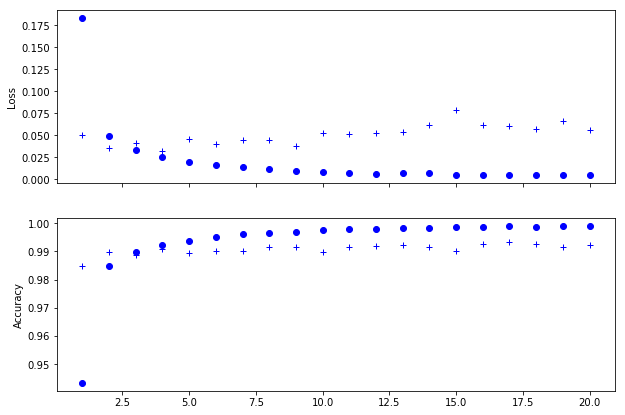

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activations.relu, input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation=activations.relu))
model.add(layers.Dense(units=10, activation=activations.softmax))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train,
                    batch_size=64, epochs=20,
                    validation_data=(x_val, y_val))
plot_history(history)

## 4 ConvNet layers + 2 Dense + Dropout after every conv layer

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 57s - loss: 0.6419 - acc: 0.7901 - val_loss: 0.1046 - val_acc: 0.9692
Epoch 2/5
55000/55000 [==============================] - 58s - loss: 0.2214 - acc: 0.9366 - val_loss: 0.0753 - val_acc: 0.9814
Epoch 3/5
55000/55000 [==============================] - 59s - loss: 0.1621 - acc: 0.9556 - val_loss: 0.0583 - val_acc: 0.9840
Epoch 4/5
55000/55000 [==============================] - 59s - loss: 0.1386 - acc: 0.9630 - val_loss: 0.0650 - val_acc: 0.9858
Epoch 5/5
55000/55000 [==============================] - 59s - loss: 0.1298 - acc: 0.9657 - val_loss: 0.0549 - val_acc: 0.9864


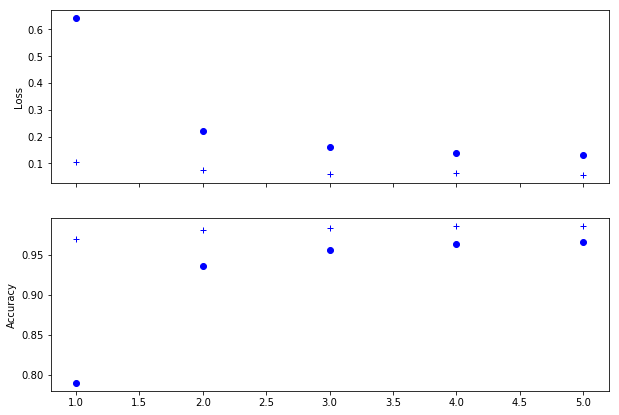

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activations.relu, input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation=activations.relu))
model.add(layers.Dense(units=10, activation=activations.softmax))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train,
                    batch_size=64, epochs=5,
                    validation_data=(x_val, y_val))
plot_history(history)

In [13]:
history = model.fit(x=partial_x_train, y=partial_y_train,
                    batch_size=64, epochs=5,
                    validation_data=(x_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 58s - loss: 0.1212 - acc: 0.9676 - val_loss: 0.0567 - val_acc: 0.9880
Epoch 2/5
55000/55000 [==============================] - 58s - loss: 0.1193 - acc: 0.9694 - val_loss: 0.0543 - val_acc: 0.9882
Epoch 3/5
55000/55000 [==============================] - 59s - loss: 0.1195 - acc: 0.9696 - val_loss: 0.0544 - val_acc: 0.9864
Epoch 4/5
55000/55000 [==============================] - 59s - loss: 0.1204 - acc: 0.9695 - val_loss: 0.0625 - val_acc: 0.9874
Epoch 5/5
55000/55000 [==============================] - 60s - loss: 0.1188 - acc: 0.9699 - val_loss: 0.0992 - val_acc: 0.9744


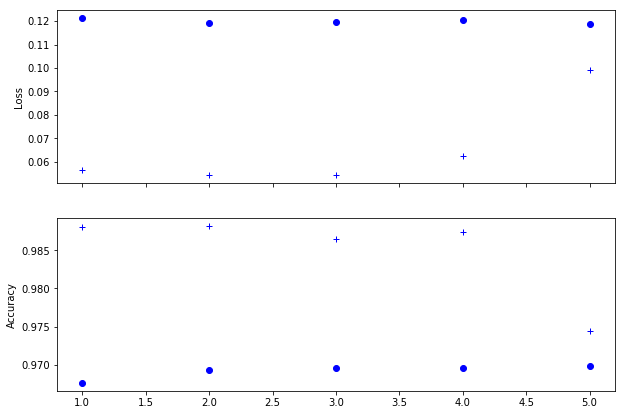

In [14]:
plot_history(history)

## 3 ConvNet layers + 2 Dense + Single Dropout after Conv Base + Adam

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 53s - loss: 0.2616 - acc: 0.9177 - val_loss: 0.0592 - val_acc: 0.9836
Epoch 2/5
55000/55000 [==============================] - 54s - loss: 0.0792 - acc: 0.9758 - val_loss: 0.0432 - val_acc: 0.9884
Epoch 3/5
55000/55000 [==============================] - 55s - loss: 0.0588 - acc: 0.9821 - val_loss: 0.0359 - val_acc: 0.9906
Epoch 4/5
55000/55000 [==============================] - 56s - loss: 0.0487 - acc: 0.9844 - val_loss: 0.0338 - val_acc: 0.9916
Epoch 5/5
55000/55000 [==============================] - 56s - loss: 0.0434 - acc: 0.9864 - val_loss: 0.0312 - val_acc: 0.9912


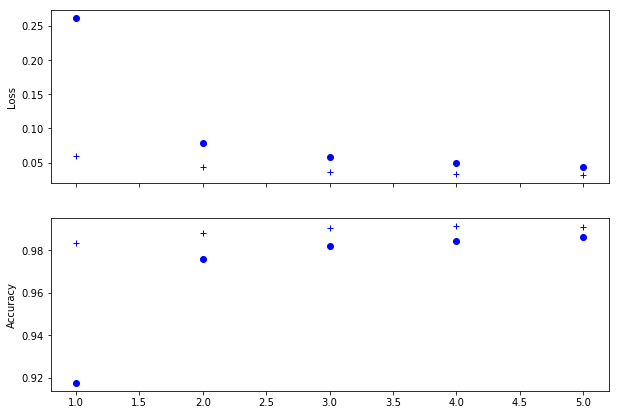

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activations.relu, input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation=activations.relu))
model.add(layers.Dense(units=10, activation=activations.softmax))

model.compile(optimizer=optimizers.Adam(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train,
                    batch_size=64, epochs=5,
                    validation_data=(x_val, y_val))
plot_history(history)

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 58s - loss: 0.0382 - acc: 0.9876 - val_loss: 0.0301 - val_acc: 0.9902
Epoch 2/5
55000/55000 [==============================] - 57s - loss: 0.0352 - acc: 0.9889 - val_loss: 0.0307 - val_acc: 0.9908
Epoch 3/5
55000/55000 [==============================] - 58s - loss: 0.0304 - acc: 0.9905 - val_loss: 0.0288 - val_acc: 0.9930
Epoch 4/5
55000/55000 [==============================] - 57s - loss: 0.0258 - acc: 0.9917 - val_loss: 0.0292 - val_acc: 0.9924
Epoch 5/5
55000/55000 [==============================] - 58s - loss: 0.0249 - acc: 0.9922 - val_loss: 0.0339 - val_acc: 0.9904


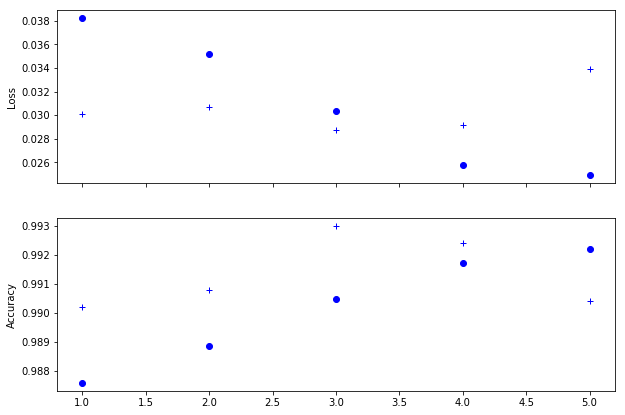

In [16]:
history = model.fit(x=partial_x_train, y=partial_y_train,
                    batch_size=64, epochs=5,
                    validation_data=(x_val, y_val))
plot_history(history)

## Using Data Augmentation

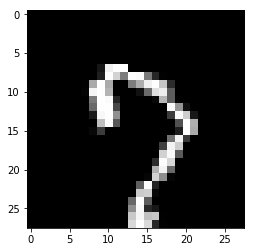

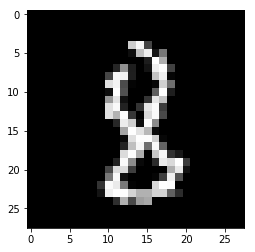

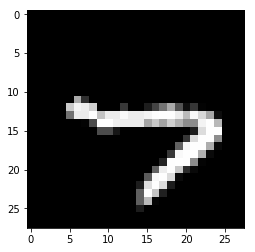

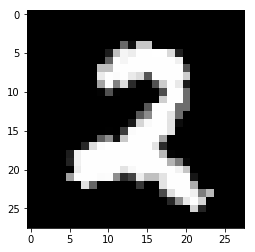

In [21]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, fill_mode='constant')

i = 0
for batch in datagen.flow(x_train, y_train, batch_size=1):
    plt.figure(i)
    plt.imshow(batch[0].reshape(28, 28), cmap='gray')
    i += 1
    if i % 4 == 0:
        break
    plt.show()

Epoch 1/5
859/859 [==============================] - 61s - loss: 0.5319 - acc: 0.8264 - val_loss: 0.0788 - val_acc: 0.9774
Epoch 2/5
859/859 [==============================] - 58s - loss: 0.2027 - acc: 0.9361 - val_loss: 0.0461 - val_acc: 0.9870
Epoch 3/5
859/859 [==============================] - 60s - loss: 0.1530 - acc: 0.9528 - val_loss: 0.0412 - val_acc: 0.9874
Epoch 4/5
859/859 [==============================] - 58s - loss: 0.1300 - acc: 0.9605 - val_loss: 0.0362 - val_acc: 0.9884
Epoch 5/5
859/859 [==============================] - 59s - loss: 0.1160 - acc: 0.9645 - val_loss: 0.0295 - val_acc: 0.9914


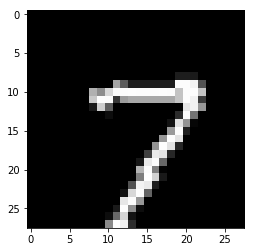

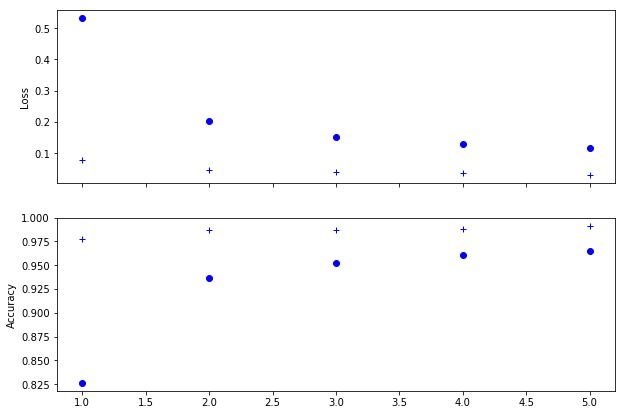

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activations.relu, input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation=activations.relu))
model.add(layers.Dense(units=10, activation=activations.softmax))

model.compile(optimizer=optimizers.Adam(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit_generator(datagen.flow(partial_x_train, partial_y_train, batch_size=64),
                    epochs=5, steps_per_epoch=55000 // 64,
                    validation_data=(x_val, y_val))
plot_history(history)

Epoch 1/5
859/859 [==============================] - 57s - loss: 0.1044 - acc: 0.9677 - val_loss: 0.0320 - val_acc: 0.9904
Epoch 2/5
859/859 [==============================] - 57s - loss: 0.0940 - acc: 0.9713 - val_loss: 0.0272 - val_acc: 0.9918
Epoch 3/5
859/859 [==============================] - 57s - loss: 0.0886 - acc: 0.9729 - val_loss: 0.0221 - val_acc: 0.9936
Epoch 4/5
859/859 [==============================] - 58s - loss: 0.0817 - acc: 0.9754 - val_loss: 0.0233 - val_acc: 0.9918
Epoch 5/5
859/859 [==============================] - 58s - loss: 0.0792 - acc: 0.9755 - val_loss: 0.0234 - val_acc: 0.9920


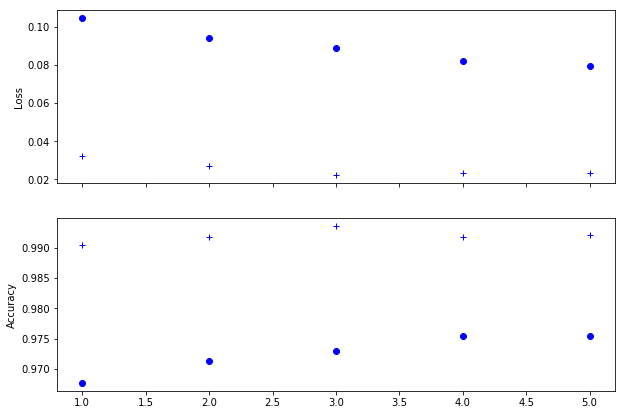

In [24]:
history = model.fit_generator(datagen.flow(partial_x_train, partial_y_train, batch_size=64),
                    epochs=5, steps_per_epoch=55000 // 64,
                    validation_data=(x_val, y_val))
plot_history(history)

Epoch 1/5
859/859 [==============================] - 57s - loss: 0.0728 - acc: 0.9776 - val_loss: 0.0233 - val_acc: 0.9926
Epoch 2/5
859/859 [==============================] - 57s - loss: 0.0726 - acc: 0.9776 - val_loss: 0.0213 - val_acc: 0.9934
Epoch 3/5
859/859 [==============================] - 57s - loss: 0.0703 - acc: 0.9783 - val_loss: 0.0229 - val_acc: 0.9936
Epoch 4/5
859/859 [==============================] - 57s - loss: 0.0674 - acc: 0.9797 - val_loss: 0.0229 - val_acc: 0.9940
Epoch 5/5
859/859 [==============================] - 57s - loss: 0.0667 - acc: 0.9797 - val_loss: 0.0228 - val_acc: 0.9930


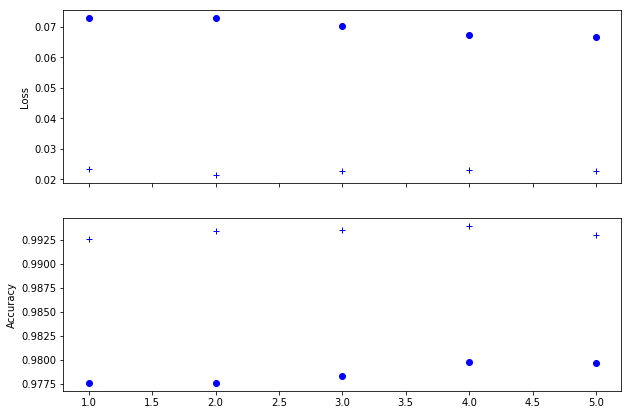

In [25]:
history = model.fit_generator(datagen.flow(partial_x_train, partial_y_train, batch_size=64),
                    epochs=5, steps_per_epoch=55000 // 64,
                    validation_data=(x_val, y_val))
plot_history(history)

Epoch 1/5
859/859 [==============================] - 57s - loss: 0.0616 - acc: 0.9811 - val_loss: 0.0220 - val_acc: 0.9944
Epoch 2/5
859/859 [==============================] - 57s - loss: 0.0613 - acc: 0.9810 - val_loss: 0.0204 - val_acc: 0.9946
Epoch 3/5
859/859 [==============================] - 57s - loss: 0.0590 - acc: 0.9819 - val_loss: 0.0181 - val_acc: 0.9956
Epoch 4/5
859/859 [==============================] - 58s - loss: 0.0587 - acc: 0.9817 - val_loss: 0.0271 - val_acc: 0.9930
Epoch 5/5
859/859 [==============================] - 58s - loss: 0.0577 - acc: 0.9825 - val_loss: 0.0232 - val_acc: 0.9928


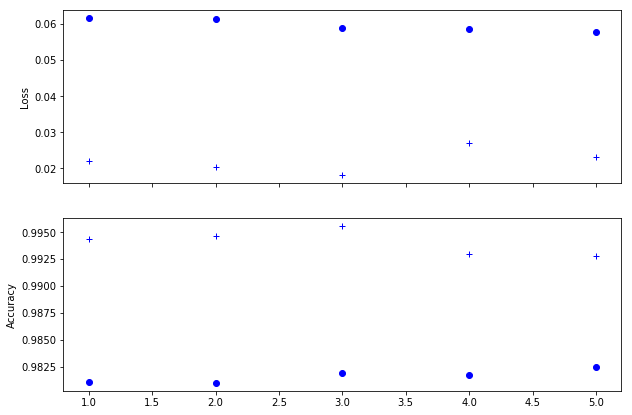

In [26]:
history = model.fit_generator(datagen.flow(partial_x_train, partial_y_train, batch_size=64),
                    epochs=5, steps_per_epoch=55000 // 64,
                    validation_data=(x_val, y_val))
plot_history(history)